# Principal Component Analysis Assignment

In [80]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Import the [PitchFX data set](https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv).

In [81]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv')

### Keep only the pitch type and the numeric columns (exluding ID fields).

* Drop any remaining records that contain null values.
* Consider `pitchType` as `y`/target and the remaining columns to be `X`/features.

In [82]:
df = data.select_dtypes(exclude='O')
df['pitchType'] = data['pitchType']
df.drop(['batterId', 'pitcherId', 'catcherId', 'umpireId'], axis=1, inplace=True)
df.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.pa

In [83]:
X = df.drop('pitchType', axis=1)
y = df.pitchType

### Reduce the dimensionality of the data using PCA to two components.

Don't forget to scale.

In [84]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_sc)

### Compute the explained variance for new data set.

In [86]:
exp_var = pca.explained_variance_
print(exp_var)

[2.38765913 1.62385775]


### Generate a scatter plot that visualizes how the component values are distributed.

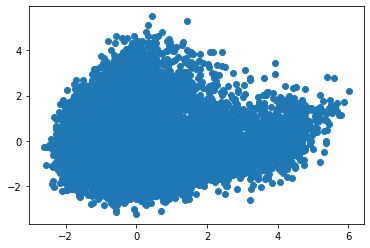

In [87]:
plt.scatter(pca_components[:,0], pca_components[:,1])
plt.show()

### Create a line plot that shows the explained variance by number of components.

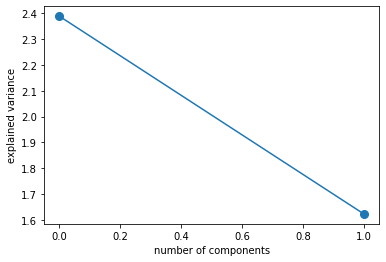

In [100]:
plt.plot(exp_var, marker='o', markersize=8)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

### Iteratively train and score a Random Forest Classifier (to predict `pitchType`).

* In each iteration:
    * Increase the number of principal components (start with `2`)
    * Store the number of components and model score

In [89]:
model = RandomForestClassifier(max_depth=4, random_state=1)

In [97]:
scores = []
for i in range(2, 16):
  pca = PCA(n_components=i)
  pca_components = pca.fit_transform(X_sc)
  rf = model.fit(pca_components, y)
  scores.append(rf.score(pca_components, y))
  print(f'Score for {i} components is: {rf.score(pca_components, y)}')

Score for 2 components is: 0.5532073225182319
Score for 3 components is: 0.5491888673909808
Score for 4 components is: 0.5606489060872154
Score for 5 components is: 0.5634767078434291
Score for 6 components is: 0.5611698169370442
Score for 7 components is: 0.5520166691471945
Score for 8 components is: 0.5628813811579104
Score for 9 components is: 0.5909361512129782
Score for 10 components is: 0.5773924691174281
Score for 11 components is: 0.5696532222056854
Score for 12 components is: 0.5638487870218782
Score for 13 components is: 0.5503795207620181
Score for 14 components is: 0.5456913231135586
Score for 15 components is: 0.5642208662003274


### Create a line plot that shows the training scores across the different numbers of principal components.

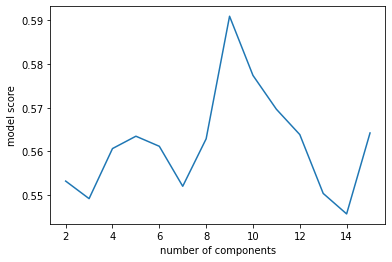

In [104]:
plt.plot(range(2, 16), scores)
plt.xlabel('number of components')
plt.ylabel('model score')
plt.show()

### Based on the analysis you conducted, what is the optimal number of principal components?

The model with 9 components had the best score, which suggests that 9 is the optimal number of components.